---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [5]:
def answer_one():
    
    df = pd.read_csv('fraud_data.csv')
    result = df.iloc[:,-1].mean()
    
    return result
#print(answer_one())


0.016410823768


In [27]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#print(df.iloc[:,[0,-1]])

             V1  Class
0      1.176563      0
1      0.681109      0
2      1.140729      0
3     -1.107073      0
4     -0.314818      0
5     -0.713266      0
6      1.219060      0
7      0.683918      0
8     -1.127820      0
9     -1.757794      0
10     0.349277      0
11    -0.411810      0
12    -1.166636      0
13    -1.156068      0
14    -1.190038      0
15    -1.927453      1
16    -1.747174      0
17    -2.168001      0
18     1.095177      0
19     0.012405      0
20     1.240972      0
21    -1.623956      0
22    -0.493634      0
23     0.832463      0
24    -0.864354      0
25     1.013856      0
26    -1.032545      0
27     0.132132      0
28     1.541905      0
29    -0.730463      0
...         ...    ...
21663  1.893277      0
21664  0.491390      0
21665  0.063739      0
21666 -0.897571      0
21667  1.293053      0
21668 -1.834765      0
21669  0.648227      0
21670  1.193230      0
21671 -0.928876      0
21672  1.154611      0
21673  1.239308      0
21674  0.00

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [14]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import accuracy_score, recall_score
    
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)
    #accuracy = accuracy_score(y_test, y_dummy_predictions)
    accuracy = dummy_majority.score(X_test, y_test)
    recall = recall_score(y_test, y_dummy_predictions)
    
    
    return (accuracy, recall)
#print(answer_two())

(0.98525073746312686, 0.0)


### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [15]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = svm.score(X_test, y_test)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return (accuracy, recall, precision)
#print(answer_three())

(0.99078171091445433, 0.375, 1.0)


### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [25]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svm = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    threshold = svm.decision_function(X_test)
    confusion = confusion_matrix(y_test, np.greater(threshold,-220))
    #print(svm.predict(X_test)[10:50])
    #print(threshold[10:50])
    
    return confusion
#print(answer_four())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0]
[ -720.8596352   -683.9156464   -547.24480983  -496.40787121  -906.90968749
  -744.87826296  -856.26987585  -173.23688158  -667.16959616  -808.74145648
  -805.17173132  -800.18079671  -797.21967253  -848.65530082  -679.81006118
  -877.86904284  -715.03672608  -592.64408251  -558.10970244  -614.90941211
  -706.42363652  -664.7068735   -655.73863467  -750.76738831  -703.39241859
  -659.90837165  -958.97214791  -948.73318383  -766.01666471  -720.02040907
  -944.64001116  -662.89067635  -329.88657483  -608.05910846   752.188422
  1488.69584719  -658.28404757  -664.77002689  -861.84453961  -455.92910167]
[[5320   24]
 [  14   66]]


### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

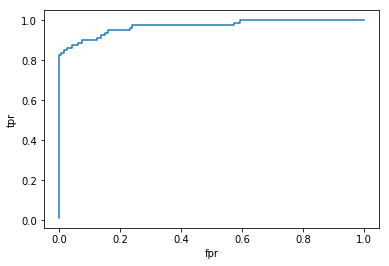

0.8

In [38]:
def answer_five():

    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve
    #import matplotlib.pyplot as plt
    #%matplotlib inline
  
    lr = LogisticRegression().fit(X_train, y_train)
    y_pred_proba = lr.predict_proba(X_test)
    pre, rec, _ = precision_recall_curve(y_test, y_pred_proba[:,1])
    fpr,tpr,_ = roc_curve(y_test, y_pred_proba[:,1])
    
    #plt.plot(fpr,tpr)
    #plt.xlabel('fpr')
    #plt.ylabel('tpr')
    #plt.show()
    
    return (0.8, 0.9)
#answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [43]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    clf = LogisticRegression()
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, cv=3, scoring='recall')
    grid_clf_acc.fit(X_train, y_train)
    result = grid_clf_acc.cv_results_
    #print(result['mean_test_score'].reshape(5,2))
    
    return result['mean_test_score'].reshape(5,2)
#answer_six()

<IPython.core.display.Javascript object>


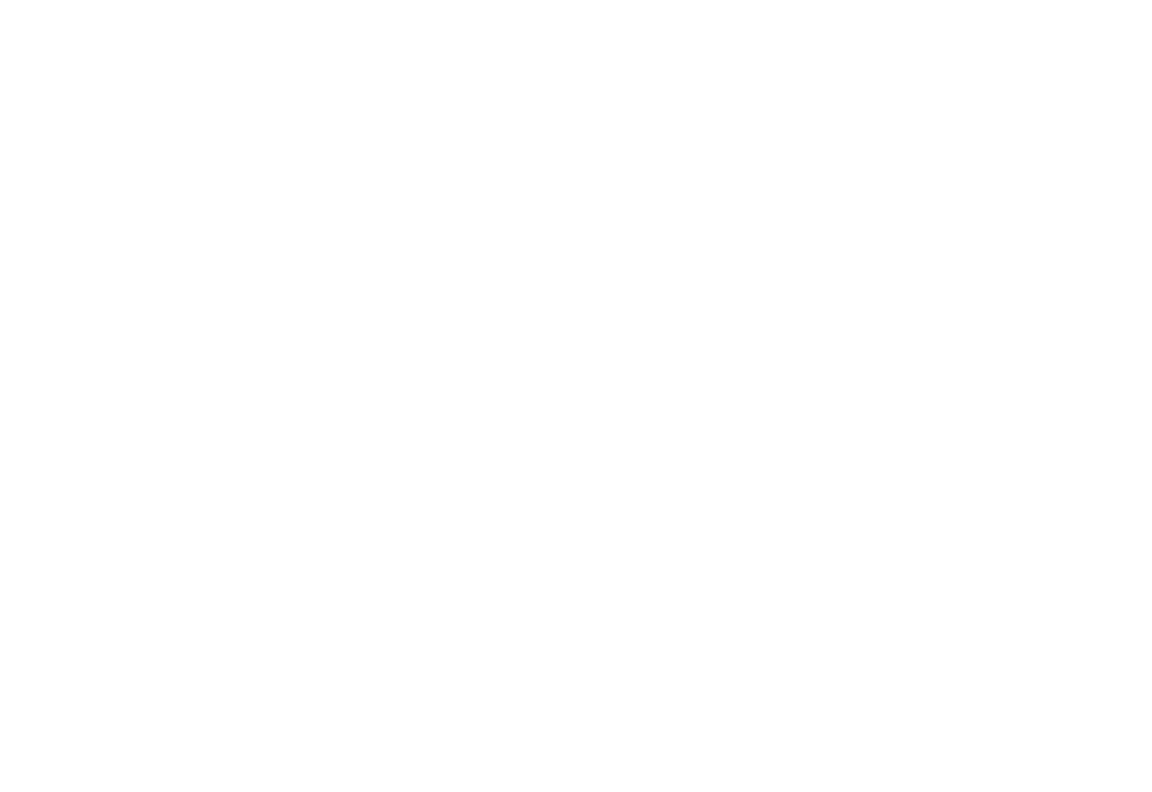

<IPython.core.display.Javascript object>


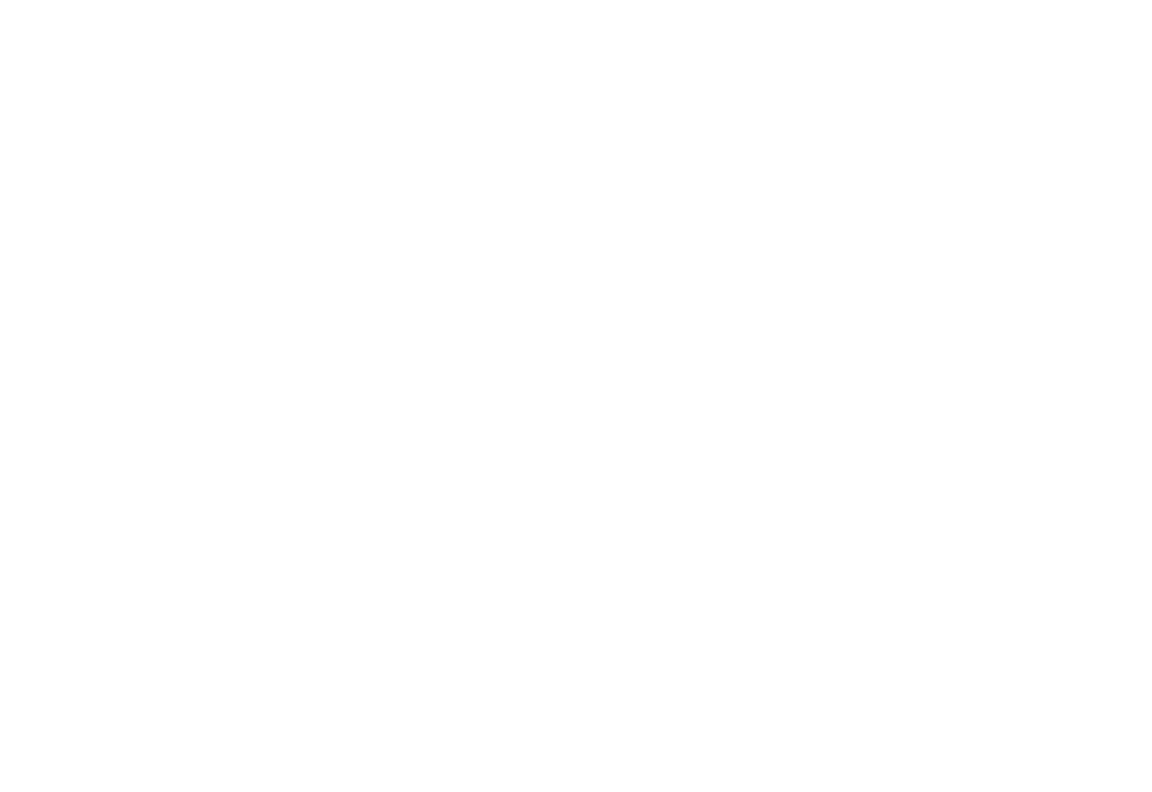

In [45]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())